In [1]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('Air_Quality_20260120.xlsx')

# Look at the first few rows
print(df.head())

# Check the shape (rows and columns)
print(f"\nDataset has {df.shape[0]} rows and {df.shape[1]} columns")

# See all column names
print("\nColumn names:")
print(df.columns.tolist())

   Unique ID  Indicator ID                     Name Measure Measure Info  \
0     878218           386               Ozone (O3)    Mean          ppb   
1     876975           375   Nitrogen dioxide (NO2)    Mean          ppb   
2     876900           375   Nitrogen dioxide (NO2)    Mean          ppb   
3     877140           375   Nitrogen dioxide (NO2)    Mean          ppb   
4     874556           365  Fine particles (PM 2.5)    Mean       mcg/m3   

  Geo Type Name  Geo Join ID                        Geo Place Name  \
0         UHF42          402                           West Queens   
1         UHF42          501                         Port Richmond   
2         UHF42          207              East Flatbush - Flatbush   
3            CD          205  Fordham and University Heights (CD5)   
4         UHF34          410                             Rockaways   

   Time Period Start_Date  Data Value  Message  
0  Summer 2023 2023-06-01   34.365989      NaN  
1  Summer 2023 2023-06-0

In [2]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check the data types
print("\nData types:")
print(df.dtypes)

Missing values in each column:
Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           18862
dtype: int64

Data types:
Unique ID                  int64
Indicator ID               int64
Name                      object
Measure                   object
Measure Info              object
Geo Type Name             object
Geo Join ID                int64
Geo Place Name            object
Time Period               object
Start_Date        datetime64[ns]
Data Value               float64
Message                  float64
dtype: object


In [3]:
# See what pollutants we have
print("Pollutants in the dataset:")
print(df['Name'].unique())

# See the date range
print(f"\nDate range: {df['Start_Date'].min()} to {df['Start_Date'].max()}")

# Quick summary statistics
print("\nPollution levels summary:")
print(df.groupby('Name')['Data Value'].describe())

Pollutants in the dataset:
['Ozone (O3)' 'Nitrogen dioxide (NO2)' 'Fine particles (PM 2.5)'
 'Annual vehicle miles traveled (cars)' 'Annual vehicle miles traveled'
 'Annual vehicle miles traveled (trucks)' 'Deaths due to PM2.5'
 'Asthma emergency department visits due to PM2.5'
 'Asthma emergency departments visits due to Ozone'
 'Asthma hospitalizations due to Ozone'
 'Cardiac and respiratory deaths due to Ozone'
 'Cardiovascular hospitalizations due to PM2.5 (age 40+)'
 'Respiratory hospitalizations due to PM2.5 (age 20+)'
 'Boiler Emissions- Total SO2 Emissions'
 'Boiler Emissions- Total NOx Emissions'
 'Boiler Emissions- Total PM2.5 Emissions' 'Outdoor Air Toxics - Benzene'
 'Outdoor Air Toxics - Formaldehyde']

Date range: 2005-01-01 00:00:00 to 2023-06-01 00:00:00

Pollution levels summary:
                                                     count       mean  \
Name                                                                    
Annual vehicle miles traveled                 

In [4]:
# Filter to just the main 3 pollutants
main_pollutants = ['Ozone (O3)', 'Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)']
df_clean = df[df['Name'].isin(main_pollutants)].copy()

print(f"Filtered data: {df_clean.shape[0]} rows")
print(f"\nPollutants included:")
print(df_clean['Name'].value_counts())

# Add Year column for easier analysis
df_clean['Year'] = df_clean['Start_Date'].dt.year

print(f"\nYears covered: {df_clean['Year'].min()} to {df_clean['Year'].max()}")

Filtered data: 14805 rows

Pollutants included:
Name
Nitrogen dioxide (NO2)     6345
Fine particles (PM 2.5)    6345
Ozone (O3)                 2115
Name: count, dtype: int64

Years covered: 2008 to 2023


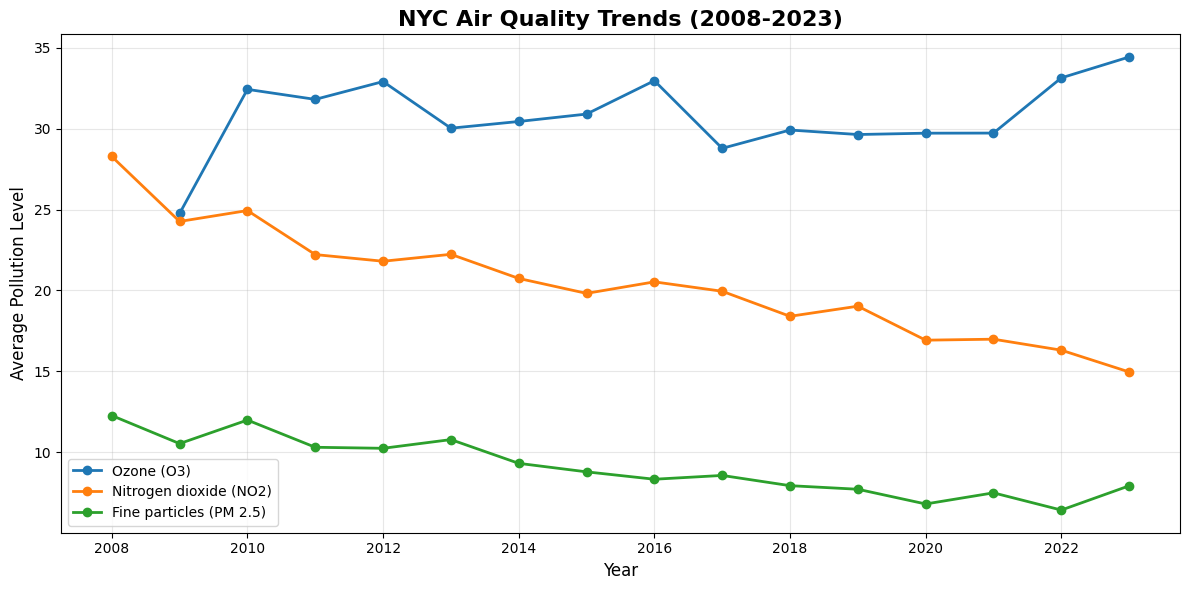

Chart created!


In [5]:
import matplotlib.pyplot as plt

# Calculate average pollution by year for each pollutant
yearly_avg = df_clean.groupby(['Year', 'Name'])['Data Value'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))

for pollutant in main_pollutants:
    data = yearly_avg[yearly_avg['Name'] == pollutant]
    plt.plot(data['Year'], data['Data Value'], marker='o', label=pollutant, linewidth=2)

plt.title('NYC Air Quality Trends (2008-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Pollution Level', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Chart created!")

In [6]:
# Focus on 2019-2021 to see COVID impact
covid_data = df_clean[df_clean['Year'].isin([2019, 2020, 2021])]

# Calculate average by year and pollutant
covid_avg = covid_data.groupby(['Year', 'Name'])['Data Value'].mean().reset_index()

# Show the numbers
print("Average Pollution Levels (2019-2021):")
for pollutant in main_pollutants:
    print(f"\n{pollutant}:")
    data = covid_avg[covid_avg['Name'] == pollutant]
    for _, row in data.iterrows():
        print(f"  {int(row['Year'])}: {row['Data Value']:.2f}")

    # Calculate percent change from 2019 to 2020
    val_2019 = data[data['Year'] == 2019]['Data Value'].values[0]
    val_2020 = data[data['Year'] == 2020]['Data Value'].values[0]
    percent_change = ((val_2020 - val_2019) / val_2019) * 100
    print(f"  Change 2019→2020: {percent_change:.1f}%")

Average Pollution Levels (2019-2021):

Ozone (O3):
  2019: 29.65
  2020: 29.73
  2021: 29.74
  Change 2019→2020: 0.3%

Nitrogen dioxide (NO2):
  2019: 19.03
  2020: 16.93
  2021: 16.99
  Change 2019→2020: -11.0%

Fine particles (PM 2.5):
  2019: 7.71
  2020: 6.80
  2021: 7.49
  Change 2019→2020: -11.8%


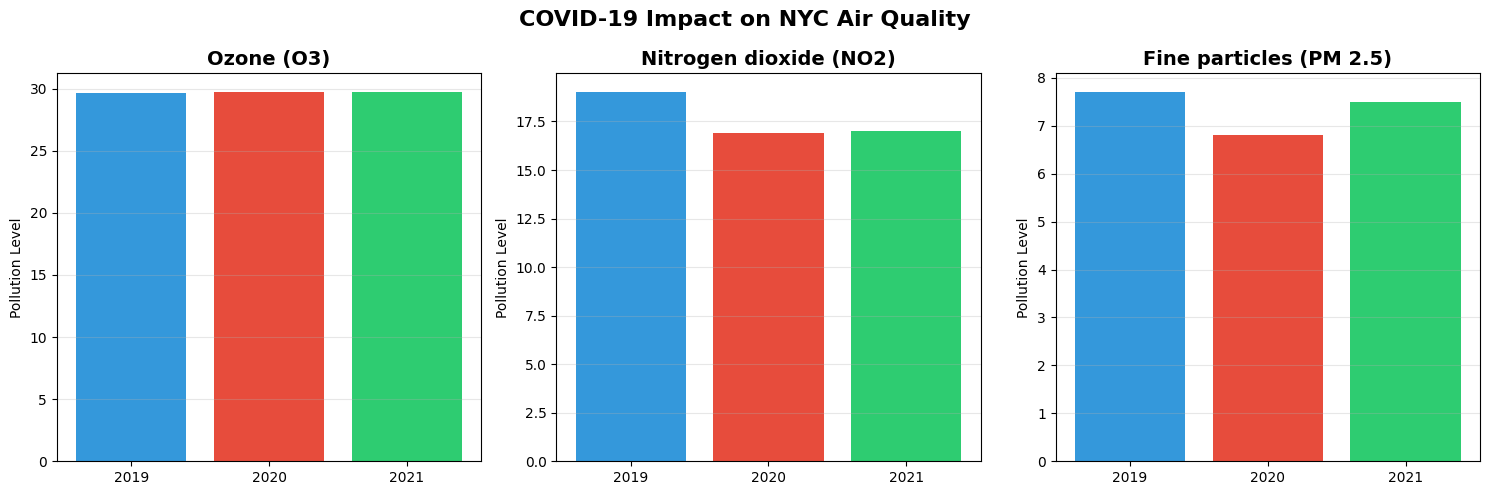

COVID impact chart created!


In [7]:
# Create bar chart comparing 2019 vs 2020
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, pollutant in enumerate(main_pollutants):
    data = covid_avg[covid_avg['Name'] == pollutant]

    axes[i].bar(['2019', '2020', '2021'], data['Data Value'],
                color=['#3498db', '#e74c3c', '#2ecc71'])
    axes[i].set_title(pollutant, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Pollution Level')
    axes[i].grid(True, alpha=0.3, axis='y')

plt.suptitle('COVID-19 Impact on NYC Air Quality', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("COVID impact chart created!")

In [8]:
# Find the neighborhoods with best and worst air quality for each pollutant
# Using 2023 data (most recent)
recent_data = df_clean[df_clean['Year'] == 2023]

print("=" * 70)
print("NEIGHBORHOODS WITH WORST AND BEST AIR QUALITY (2023)")
print("=" * 70)

for pollutant in main_pollutants:
    pollutant_data = recent_data[recent_data['Name'] == pollutant]

    # Get average by neighborhood
    neighborhood_avg = pollutant_data.groupby('Geo Place Name')['Data Value'].mean().sort_values()

    print(f"\n{pollutant}:")
    print(f"\n  CLEANEST neighborhoods:")
    for i, (neighborhood, value) in enumerate(neighborhood_avg.head(3).items(), 1):
        print(f"    {i}. {neighborhood}: {value:.2f}")

    print(f"\n  MOST POLLUTED neighborhoods:")
    for i, (neighborhood, value) in enumerate(neighborhood_avg.tail(3).items(), 1):
        print(f"    {i}. {neighborhood}: {value:.2f}")

    print("-" * 70)

NEIGHBORHOODS WITH WORST AND BEST AIR QUALITY (2023)

Ozone (O3):

  CLEANEST neighborhoods:
    1. Chelsea - Clinton: 28.35
    2. Midtown (CD5): 28.43
    3. Clinton and Chelsea (CD4): 28.47

  MOST POLLUTED neighborhoods:
    1. Coney Island (CD13): 41.29
    2. Rockaways: 43.33
    3. Rockaway and Broad Channel (CD14): 43.40
----------------------------------------------------------------------

Nitrogen dioxide (NO2):

  CLEANEST neighborhoods:
    1. Rockaway and Broad Channel (CD14): 7.91
    2. Rockaways: 7.93
    3. Tottenville and Great Kills (CD3): 9.03

  MOST POLLUTED neighborhoods:
    1. Chelsea-Village: 22.19
    2. Chelsea - Clinton: 22.68
    3. Midtown (CD5): 24.17
----------------------------------------------------------------------

Fine particles (PM 2.5):

  CLEANEST neighborhoods:
    1. Rockaway and Broad Channel (CD14): 7.14
    2. Rockaways: 7.14
    3. Tottenville and Great Kills (CD3): 7.16

  MOST POLLUTED neighborhoods:
    1. Greenwich Village and Soho 

In [9]:
# Calculate exact changes from 2008 to 2023
print("=" * 70)
print("EXACT POLLUTION CHANGES: 2008 vs 2023")
print("=" * 70)

# Filter for 2008 and 2023 only
comparison_years = df_clean[df_clean['Year'].isin([2008, 2023])]

for pollutant in main_pollutants:
    pollutant_data = comparison_years[comparison_years['Name'] == pollutant]

    # Get averages for each year
    avg_2008 = pollutant_data[pollutant_data['Year'] == 2008]['Data Value'].mean()
    avg_2023 = pollutant_data[pollutant_data['Year'] == 2023]['Data Value'].mean()

    # Calculate change
    absolute_change = avg_2023 - avg_2008
    percent_change = ((avg_2023 - avg_2008) / avg_2008) * 100

    print(f"\n{pollutant}:")
    print(f"  2008 Average: {avg_2008:.2f}")
    print(f"  2023 Average: {avg_2023:.2f}")
    print(f"  Absolute Change: {absolute_change:.2f}")
    print(f"  Percent Change: {percent_change:.1f}%")

    if percent_change < 0:
        print(f"  ✓ IMPROVED by {abs(percent_change):.1f}%")
    else:
        print(f"  ✗ WORSENED by {percent_change:.1f}%")
    print("-" * 70)

EXACT POLLUTION CHANGES: 2008 vs 2023

Ozone (O3):
  2008 Average: nan
  2023 Average: 34.44
  Absolute Change: nan
  Percent Change: nan%
  ✗ WORSENED by nan%
----------------------------------------------------------------------

Nitrogen dioxide (NO2):
  2008 Average: 28.29
  2023 Average: 14.96
  Absolute Change: -13.32
  Percent Change: -47.1%
  ✓ IMPROVED by 47.1%
----------------------------------------------------------------------

Fine particles (PM 2.5):
  2008 Average: 12.27
  2023 Average: 7.92
  Absolute Change: -4.35
  Percent Change: -35.4%
  ✓ IMPROVED by 35.4%
----------------------------------------------------------------------


In [10]:
# Check what years each pollutant has data for
print("Data availability by pollutant:\n")

for pollutant in main_pollutants:
    pollutant_data = df_clean[df_clean['Name'] == pollutant]
    years = sorted(pollutant_data['Year'].unique())
    print(f"{pollutant}:")
    print(f"  First year: {years[0]}")
    print(f"  Last year: {years[-1]}")
    print(f"  Total years: {len(years)}")
    print()

Data availability by pollutant:

Ozone (O3):
  First year: 2009
  Last year: 2023
  Total years: 15

Nitrogen dioxide (NO2):
  First year: 2008
  Last year: 2023
  Total years: 16

Fine particles (PM 2.5):
  First year: 2008
  Last year: 2023
  Total years: 16



In [11]:
# Calculate exact changes with correct years
print("=" * 70)
print("EXACT POLLUTION CHANGES (2008/2009 to 2023)")
print("=" * 70)

# NO2 and PM 2.5: 2008 to 2023
for pollutant in ['Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)']:
    comparison_years = df_clean[df_clean['Year'].isin([2008, 2023])]
    pollutant_data = comparison_years[comparison_years['Name'] == pollutant]

    avg_2008 = pollutant_data[pollutant_data['Year'] == 2008]['Data Value'].mean()
    avg_2023 = pollutant_data[pollutant_data['Year'] == 2023]['Data Value'].mean()

    absolute_change = avg_2023 - avg_2008
    percent_change = ((avg_2023 - avg_2008) / avg_2008) * 100

    print(f"\n{pollutant} (2008 → 2023):")
    print(f"  2008: {avg_2008:.2f}")
    print(f"  2023: {avg_2023:.2f}")
    print(f"  Change: {percent_change:.1f}%")
    print(f"  ✓ IMPROVED by {abs(percent_change):.1f}%")
    print("-" * 70)

# Ozone: 2009 to 2023
comparison_years = df_clean[df_clean['Year'].isin([2009, 2023])]
pollutant_data = comparison_years[comparison_years['Name'] == 'Ozone (O3)']

avg_2009 = pollutant_data[pollutant_data['Year'] == 2009]['Data Value'].mean()
avg_2023 = pollutant_data[pollutant_data['Year'] == 2023]['Data Value'].mean()

absolute_change = avg_2023 - avg_2009
percent_change = ((avg_2023 - avg_2009) / avg_2009) * 100

print(f"\nOzone (O3) (2009 → 2023):")
print(f"  2009: {avg_2009:.2f}")
print(f"  2023: {avg_2023:.2f}")
print(f"  Change: {percent_change:.1f}%")
print(f"  ✗ WORSENED by {percent_change:.1f}%")
print("=" * 70)

EXACT POLLUTION CHANGES (2008/2009 to 2023)

Nitrogen dioxide (NO2) (2008 → 2023):
  2008: 28.29
  2023: 14.96
  Change: -47.1%
  ✓ IMPROVED by 47.1%
----------------------------------------------------------------------

Fine particles (PM 2.5) (2008 → 2023):
  2008: 12.27
  2023: 7.92
  Change: -35.4%
  ✓ IMPROVED by 35.4%
----------------------------------------------------------------------

Ozone (O3) (2009 → 2023):
  2009: 24.76
  2023: 34.44
  Change: 39.1%
  ✗ WORSENED by 39.1%


In [12]:
# Add Season column based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # 9, 10, 11
        return 'Fall'

# Extract month and create Season column
df_clean['Month'] = df_clean['Start_Date'].dt.month
df_clean['Season'] = df_clean['Month'].apply(get_season)

# Check it worked
print("Seasons created successfully!")
print("\nSample of data with seasons:")
print(df_clean[['Start_Date', 'Month', 'Season', 'Name', 'Data Value']].head(10))

# Count measurements by season
print("\nMeasurements by season:")
print(df_clean['Season'].value_counts().sort_index())

Seasons created successfully!

Sample of data with seasons:
  Start_Date  Month  Season                     Name  Data Value
0 2023-06-01      6  Summer               Ozone (O3)   34.365989
1 2023-06-01      6  Summer   Nitrogen dioxide (NO2)   11.331992
2 2023-06-01      6  Summer   Nitrogen dioxide (NO2)   12.020333
3 2023-06-01      6  Summer   Nitrogen dioxide (NO2)   14.123178
4 2023-06-01      6  Summer  Fine particles (PM 2.5)    8.150637
5 2023-06-01      6  Summer               Ozone (O3)   38.295018
6 2023-06-01      6  Summer  Fine particles (PM 2.5)    8.147910
7 2023-06-01      6  Summer   Nitrogen dioxide (NO2)    6.452587
8 2023-06-01      6  Summer               Ozone (O3)   28.588246
9 2023-06-01      6  Summer  Fine particles (PM 2.5)    9.490784

Measurements by season:
Season
Summer    6345
Winter    8460
Name: count, dtype: int64


In [13]:
# Check all seasons in detail
print("Full breakdown of seasons:")
print(df_clean['Season'].value_counts())

print("\nUnique seasons in data:")
print(df_clean['Season'].unique())

Full breakdown of seasons:
Season
Winter    8460
Summer    6345
Name: count, dtype: int64

Unique seasons in data:
['Summer' 'Winter']


In [14]:
# Compare pollution levels by season
print("=" * 70)
print("SEASONAL POLLUTION COMPARISON (Summer vs Winter)")
print("=" * 70)

for pollutant in main_pollutants:
    pollutant_data = df_clean[df_clean['Name'] == pollutant]

    # Calculate average by season
    seasonal_avg = pollutant_data.groupby('Season')['Data Value'].mean().sort_values(ascending=False)

    print(f"\n{pollutant}:")
    for season, value in seasonal_avg.items():
        print(f"  {season}: {value:.2f}")

    # Find highest and lowest
    highest = seasonal_avg.idxmax()
    lowest = seasonal_avg.idxmin()
    difference = seasonal_avg.max() - seasonal_avg.min()
    percent_diff = (difference / seasonal_avg.min()) * 100

    print(f"\n  Highest: {highest} ({seasonal_avg.max():.2f})")
    print(f"  Lowest: {lowest} ({seasonal_avg.min():.2f})")
    print(f"  Difference: {percent_diff:.1f}% higher in {highest}")
    print("-" * 70)

SEASONAL POLLUTION COMPARISON (Summer vs Winter)

Ozone (O3):
  Summer: 30.78

  Highest: Summer (30.78)
  Lowest: Summer (30.78)
  Difference: 0.0% higher in Summer
----------------------------------------------------------------------

Nitrogen dioxide (NO2):
  Winter: 22.60
  Summer: 15.98

  Highest: Winter (22.60)
  Lowest: Summer (15.98)
  Difference: 41.4% higher in Winter
----------------------------------------------------------------------

Fine particles (PM 2.5):
  Summer: 9.43
  Winter: 8.85

  Highest: Summer (9.43)
  Lowest: Winter (8.85)
  Difference: 6.5% higher in Summer
----------------------------------------------------------------------


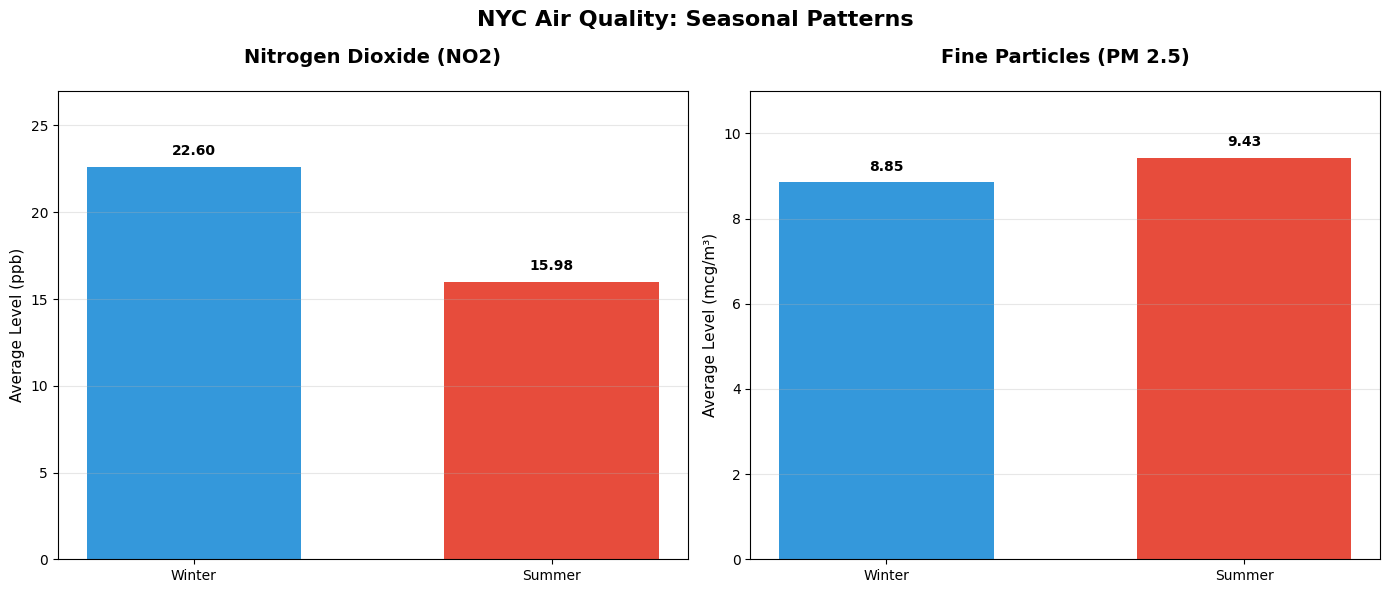

Seasonal comparison chart created!


In [15]:
import matplotlib.pyplot as plt

# Create seasonal comparison chart
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: NO2 - Winter vs Summer
seasons_no2 = ['Winter', 'Summer']
values_no2 = [22.60, 15.98]
bars1 = axes[0].bar(seasons_no2, values_no2, color=['#3498db', '#e74c3c'], width=0.6)
axes[0].set_title('Nitrogen Dioxide (NO2)', fontsize=14, fontweight='bold', pad=20)
axes[0].set_ylabel('Average Level (ppb)', fontsize=11)
axes[0].set_ylim(0, 27)
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{values_no2[i]:.2f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Chart 2: PM 2.5 - Winter vs Summer
seasons_pm = ['Winter', 'Summer']
values_pm = [8.85, 9.43]
bars2 = axes[1].bar(seasons_pm, values_pm, color=['#3498db', '#e74c3c'], width=0.6)
axes[1].set_title('Fine Particles (PM 2.5)', fontsize=14, fontweight='bold', pad=20)
axes[1].set_ylabel('Average Level (mcg/m³)', fontsize=11)
axes[1].set_ylim(0, 11)
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.2,
                f'{values_pm[i]:.2f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('NYC Air Quality: Seasonal Patterns', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Seasonal comparison chart created!")

In [16]:
# Check what geographic data we have
print("Sample of geographic columns:")
print(df_clean[['Geo Place Name', 'Geo Type Name']].head(20))

print("\nUnique Geo Type Names:")
print(df_clean['Geo Type Name'].unique())

print("\nCount by Geo Type:")
print(df_clean['Geo Type Name'].value_counts())

Sample of geographic columns:
                          Geo Place Name Geo Type Name
0                            West Queens         UHF42
1                          Port Richmond         UHF42
2               East Flatbush - Flatbush         UHF42
3   Fordham and University Heights (CD5)            CD
4                              Rockaways         UHF34
5                   Canarsie - Flatlands         UHF42
6      Rockaway and Broad Channel (CD14)            CD
7      Rockaway and Broad Channel (CD14)            CD
8                        Chelsea-Village         UHF34
9                             Greenpoint         UHF34
10                    Fordham - Bronx Pk         UHF42
11              Upper East Side-Gramercy         UHF34
12              Hunts Point - Mott Haven         UHF42
13                                 Bronx       Borough
14                                Queens       Borough
15                               Jamaica         UHF34
16              East Flatbush - Fla

In [17]:
# Filter for borough-level data only
borough_data = df_clean[df_clean['Geo Type Name'] == 'Borough'].copy()

print(f"Borough data: {borough_data.shape[0]} records")

print("\nBoroughs in dataset:")
print(borough_data['Geo Place Name'].unique())

print("\nMeasurements per borough:")
print(borough_data['Geo Place Name'].value_counts())

Borough data: 525 records

Boroughs in dataset:
['Bronx' 'Queens' 'Staten Island' 'Brooklyn' 'Manhattan']

Measurements per borough:
Geo Place Name
Bronx            105
Queens           105
Staten Island    105
Brooklyn         105
Manhattan        105
Name: count, dtype: int64


In [18]:
# Compare pollution levels by borough
print("=" * 70)
print("BOROUGH AIR QUALITY COMPARISON")
print("=" * 70)

for pollutant in main_pollutants:
    pollutant_data = borough_data[borough_data['Name'] == pollutant]

    # Calculate average by borough
    borough_avg = pollutant_data.groupby('Geo Place Name')['Data Value'].mean().sort_values()

    print(f"\n{pollutant}:")
    print("\n  CLEANEST to MOST POLLUTED:")
    for i, (borough, value) in enumerate(borough_avg.items(), 1):
        print(f"    {i}. {borough}: {value:.2f}")

    # Calculate difference between best and worst
    cleanest = borough_avg.index[0]
    most_polluted = borough_avg.index[-1]
    difference = borough_avg.iloc[-1] - borough_avg.iloc[0]
    percent_diff = (difference / borough_avg.iloc[0]) * 100

    print(f"\n  Cleanest: {cleanest} ({borough_avg.iloc[0]:.2f})")
    print(f"  Most Polluted: {most_polluted} ({borough_avg.iloc[-1]:.2f})")
    print(f"  Difference: {percent_diff:.1f}% higher in {most_polluted}")
    print("-" * 70)

BOROUGH AIR QUALITY COMPARISON

Ozone (O3):

  CLEANEST to MOST POLLUTED:
    1. Manhattan: 27.44
    2. Bronx: 31.17
    3. Staten Island: 31.75
    4. Brooklyn: 31.99
    5. Queens: 32.46

  Cleanest: Manhattan (27.44)
  Most Polluted: Queens (32.46)
  Difference: 18.3% higher in Queens
----------------------------------------------------------------------

Nitrogen dioxide (NO2):

  CLEANEST to MOST POLLUTED:
    1. Staten Island: 14.10
    2. Queens: 18.38
    3. Bronx: 19.43
    4. Brooklyn: 19.43
    5. Manhattan: 25.43

  Cleanest: Staten Island (14.10)
  Most Polluted: Manhattan (25.43)
  Difference: 80.4% higher in Manhattan
----------------------------------------------------------------------

Fine particles (PM 2.5):

  CLEANEST to MOST POLLUTED:
    1. Staten Island: 8.05
    2. Queens: 8.43
    3. Brooklyn: 8.76
    4. Bronx: 9.07
    5. Manhattan: 10.20

  Cleanest: Staten Island (8.05)
  Most Polluted: Manhattan (10.20)
  Difference: 26.7% higher in Manhattan
----------

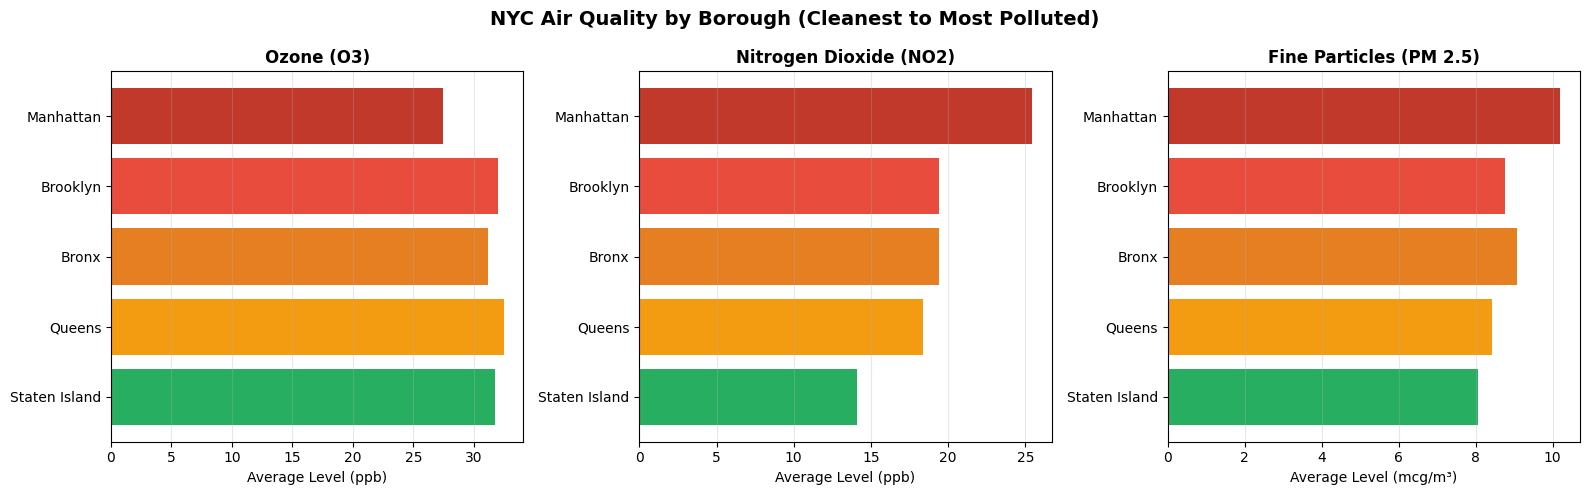

Borough comparison chart created!


In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for visualization
boroughs = ['Staten Island', 'Queens', 'Bronx', 'Brooklyn', 'Manhattan']

# Data for each pollutant (in order from cleanest to most polluted)
ozone_values = [31.75, 32.46, 31.17, 31.99, 27.44]
no2_values = [14.10, 18.38, 19.43, 19.43, 25.43]
pm25_values = [8.05, 8.43, 9.07, 8.76, 10.20]

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Color scheme: green (cleanest) to red (most polluted)
colors_ozone = ['#27ae60', '#f39c12', '#e67e22', '#e74c3c', '#c0392b']
colors_no2 = ['#27ae60', '#f39c12', '#e67e22', '#e74c3c', '#c0392b']
colors_pm25 = ['#27ae60', '#f39c12', '#e67e22', '#e74c3c', '#c0392b']

# Ozone chart
axes[0].barh(boroughs, ozone_values, color=colors_ozone)
axes[0].set_xlabel('Average Level (ppb)', fontsize=10)
axes[0].set_title('Ozone (O3)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# NO2 chart
axes[1].barh(boroughs, no2_values, color=colors_no2)
axes[1].set_xlabel('Average Level (ppb)', fontsize=10)
axes[1].set_title('Nitrogen Dioxide (NO2)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

# PM 2.5 chart
axes[2].barh(boroughs, pm25_values, color=colors_pm25)
axes[2].set_xlabel('Average Level (mcg/m³)', fontsize=10)
axes[2].set_title('Fine Particles (PM 2.5)', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='x')

plt.suptitle('NYC Air Quality by Borough (Cleanest to Most Polluted)',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Borough comparison chart created!")